# CART Algorithms with Scikit-Learn  
Developed By:


*   Ahmad Mukhtar
*   Muhammad Abubakar Tahir
*   Muhammad Ehtesham
*   Nobukhosi Sibanda


---

## Project Description

This notebook explores the CART (Classification and Regression Tree) algorithms using Python's Scikit-Learn library. Both **classification** and **regression** modeling will be performed using the following models:

- `DecisionTreeClassifier`  
- `DecisionTreeRegressor`  
- `RandomForestClassifier`  
- `RandomForestRegressor`  

### Datasets:
- **Classification:** Handwritten Digits Dataset  
  [Load Digits Dataset Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)  
- **Regression:** California Housing Dataset (Target: `MedHouseVal`)  
  [Fetch California Housing Dataset Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)  

---

## Tasks Overview

1. **Exploratory Data Analysis (EDA)** on both datasets.  

2. **Classification (Default Parameters):**  
   - Apply `DecisionTreeClassifier` and `RandomForestClassifier`.  
   - Compare performance using Confusion Matrices.  

3. **Classification (With Hyperparameter Tuning):**  
   - Tune classifiers and compare performance using Confusion Matrices.  

4. **Regression (Default Parameters):**  
   - Apply `DecisionTreeRegressor` and `RandomForestRegressor`.  
   - Evaluate using Mean Squared Error (MSE) and R² (Coefficient of Determination).  

5. **Regression (With Hyperparameter Tuning):**  
   - Tune regressors and compare performance using MSE and R².  

6. **Feature Importance:**  
   - Print and analyze feature importances (Gini importance) for each model.

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from IPython.display import display

from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF (Variance Inflation Factor) used to detect multicollinearity among features
from sklearn.preprocessing import StandardScaler # StandardScaler standardizes features by removing the mean and scaling to unit variance
from sklearn.datasets import load_digits, fetch_california_housing # Built-in datasets: digits (for classification), California housing (for regression)
from sklearn.model_selection import train_test_split, GridSearchCV # Utility to split dataset into training and testing sets; GridSearchCV is used for hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree models for classification and regression tasks
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Random Forest models for classification and regression (ensemble of decision trees)
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score # Evaluation metrics: confusion matrix, classification report, MSE (for regression), and R^2 score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score # ConfusionMatrixDisplay: to visualize the confusion matrix , accuracy_score: to calculate the prediction accuracy


# DataSet 1 -> Digits

In [ ]:
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
print("Digits data shape:", X_digits.shape)

Digits data shape: (1797, 64)


# DataSet 2-> California Housing DataSet

In [ ]:
california = fetch_california_housing(as_frame=True)
df_california = california.frame
X_california = df_california.drop("MedHouseVal", axis=1)
y_california = df_california["MedHouseVal"]

california.data
california.target
california.frame.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# EDA On California Housing
Contains Following operations


*   Summary
*   EDA-> Colleration Matrix
*   EDA-> VIF Calculation
*   OutLiers Detection



Summary Statistics
              count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup    20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude    20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude   20640.0  -119.569704     2.003532 -124.350000 -121.800000   

                    50%          75%           max  
MedInc         3.534800     4.743250     15.000100  
HouseAge      29.000000    37.000000     52.000000  
AveRooms       5.229129     6.052381    141.909091  
AveBedrms      1.048780     1.099526     34.066667  
Population  1166.000000  1725.000000  35682.000000  
AveOc

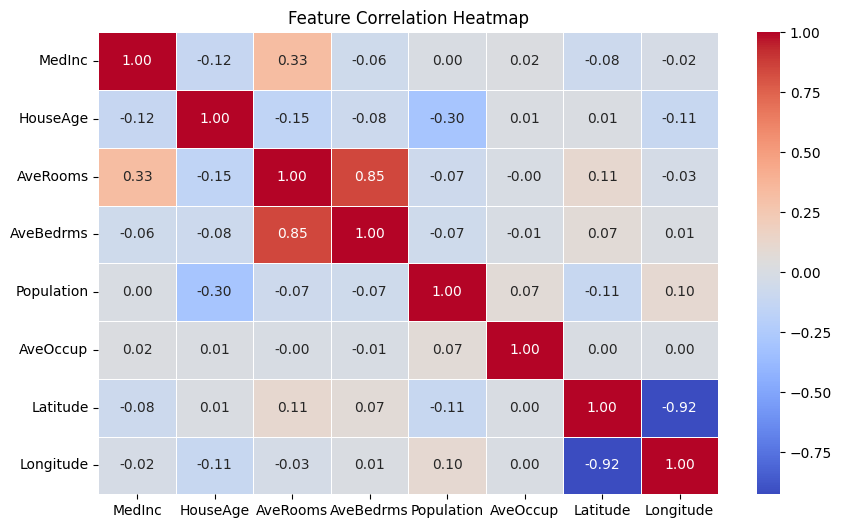

VIF Calculation

VIF Scores:
      Feature       VIF
0      MedInc  2.501295
1    HouseAge  1.241254
2    AveRooms  8.342786
3   AveBedrms  6.994995
4  Population  1.138125
5    AveOccup  1.008324
6    Latitude  9.297624
7   Longitude  8.962263
OutLiers Detection & Removal


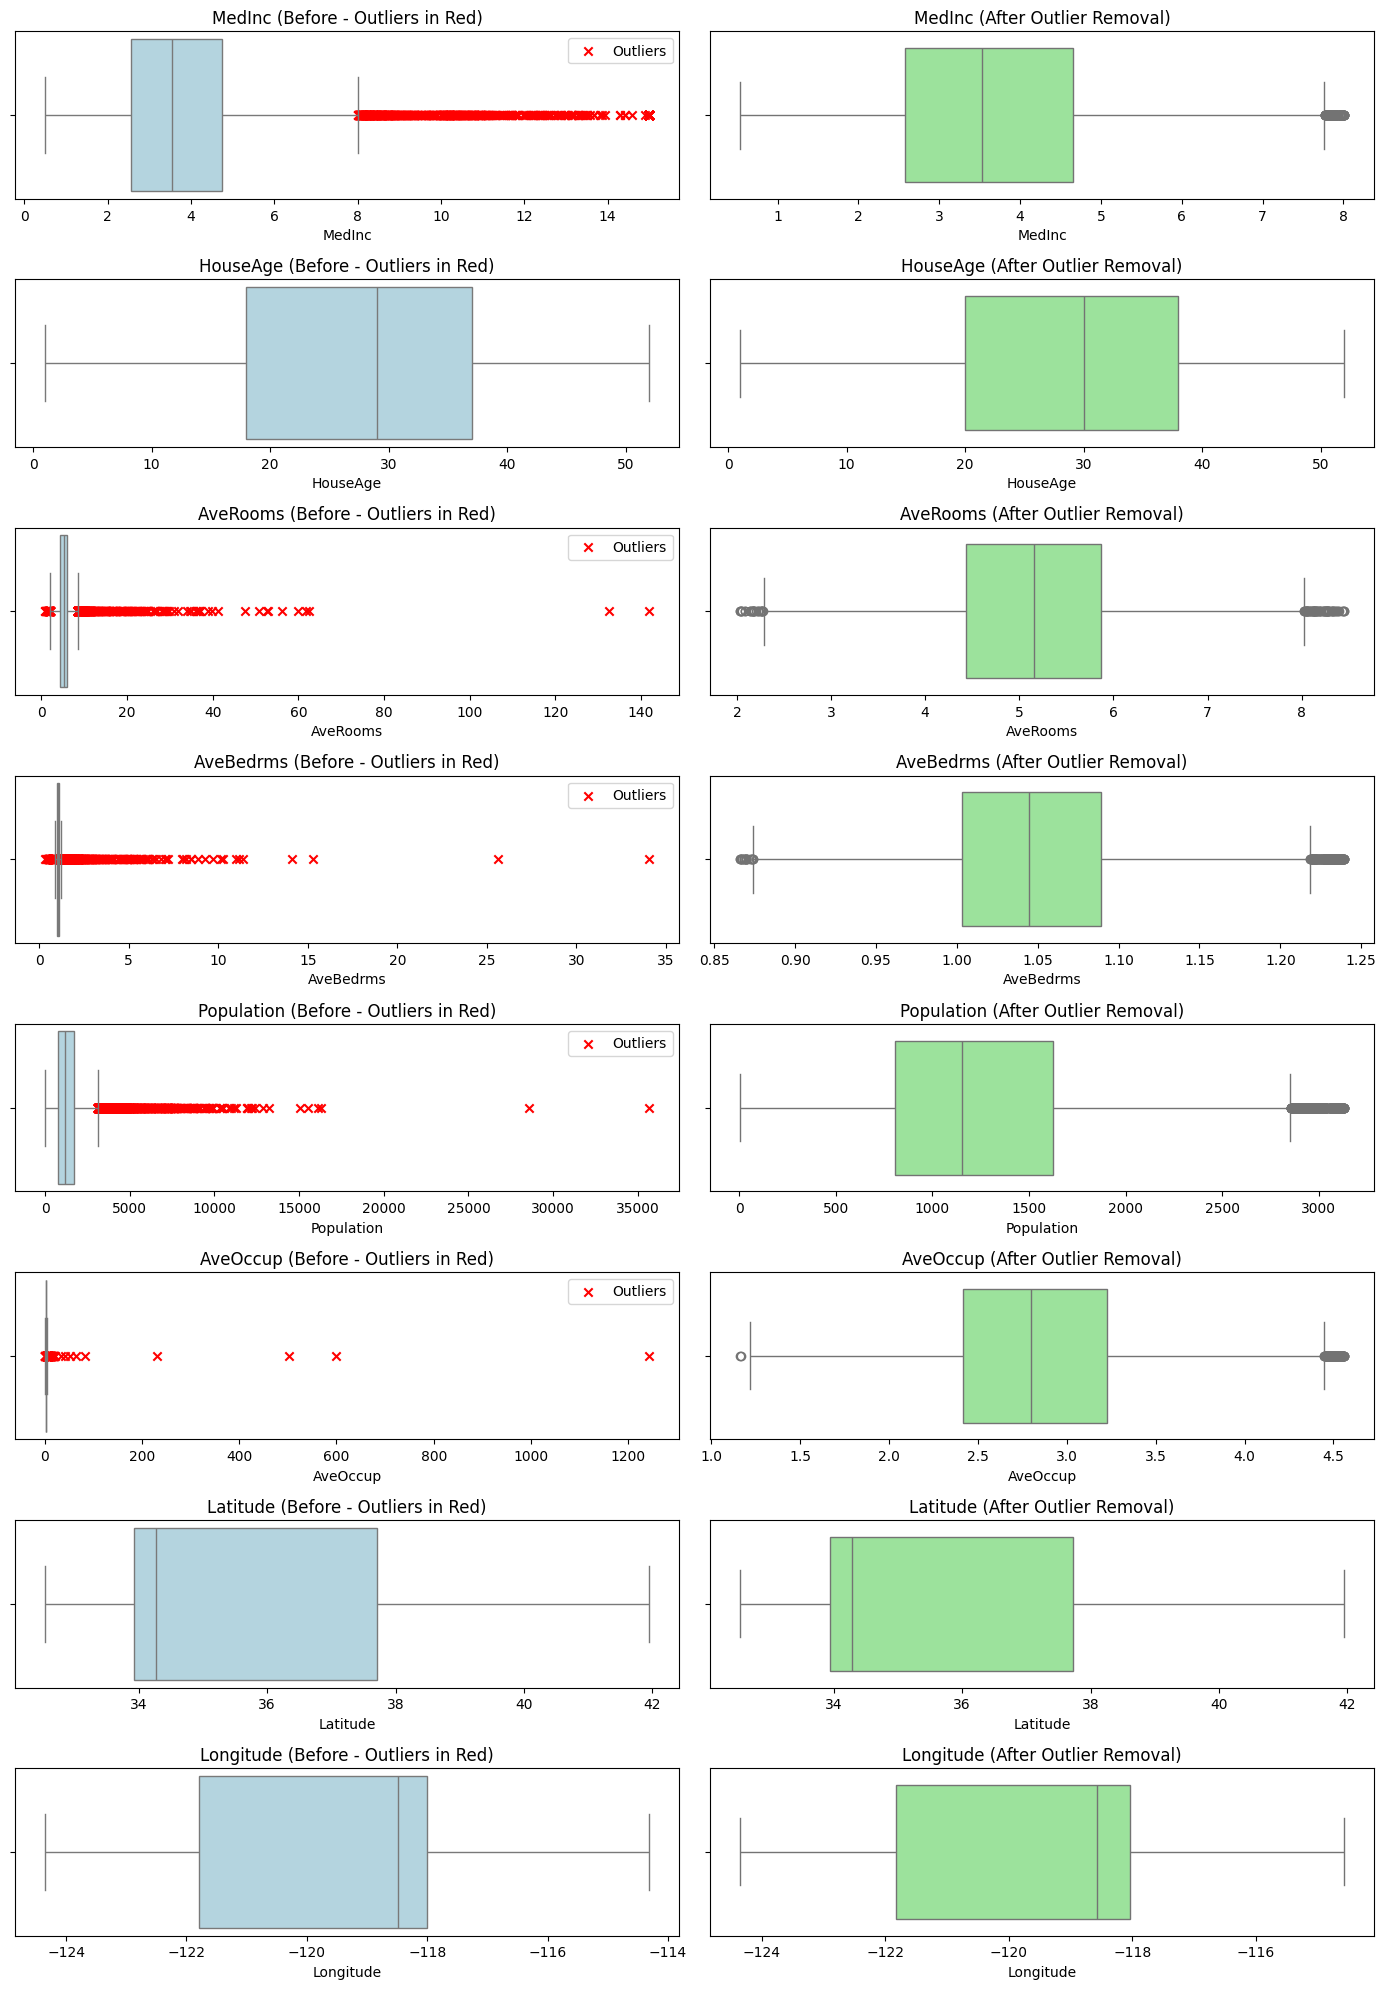

In [ ]:
print("Summary Statistics")
print(X_california.describe().T)

print("\nMissing Values:")
print(X_california.isnull().sum())


print("Correlation Matrix")
plt.figure(figsize=(10, 6))
sns.heatmap(X_california.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


print("VIF Calculation")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_california)


vif_df = pd.DataFrame()
vif_df["Feature"] = X_california.columns
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("VIF Scores:")
print(vif_df)

print("OutLiers Detection & Removal")
def get_outlier_mask(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Step 2: Outlier Removal Function
def remove_outliers_iqr(df):
    cleaned_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df

# Cleaned Dataset (IQR Removed)
X_cleaned = remove_outliers_iqr(X_california)

# Plot Before vs After in Same Row
num_cols = len(X_california.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(14, 2.5 * num_cols))

for idx, col in enumerate(X_california.columns):
    # Plot before with outliers
    ax1 = axes[idx, 0]
    outlier_mask = get_outlier_mask(X_california[col])
    sns.boxplot(x=X_california[col], orient='h', ax=ax1, color='lightblue', fliersize=0)
    ax1.scatter(X_california[col][outlier_mask], [0]*sum(outlier_mask), color='red', marker='x', label='Outliers')
    ax1.set_title(f'{col} (Before - Outliers in Red)')
    if outlier_mask.any():
        ax1.legend(loc='upper right')

    # Plot after (cleaned)
    ax2 = axes[idx, 1]
    if col in X_cleaned.columns:
        sns.boxplot(x=X_cleaned[col], orient='h', ax=ax2, color='lightgreen')
        ax2.set_title(f'{col} (After Outlier Removal)')

plt.tight_layout()
plt.show()

# Final assignment for modeling
X = X_cleaned
y = y_california.loc[X.index]  # align y with cleaned X


#California Housing MISC. Tasks


*   Decision Tree Regressor
*   Random Forest Regressor
*   Evaluation of different models
*   Hyper Tuning



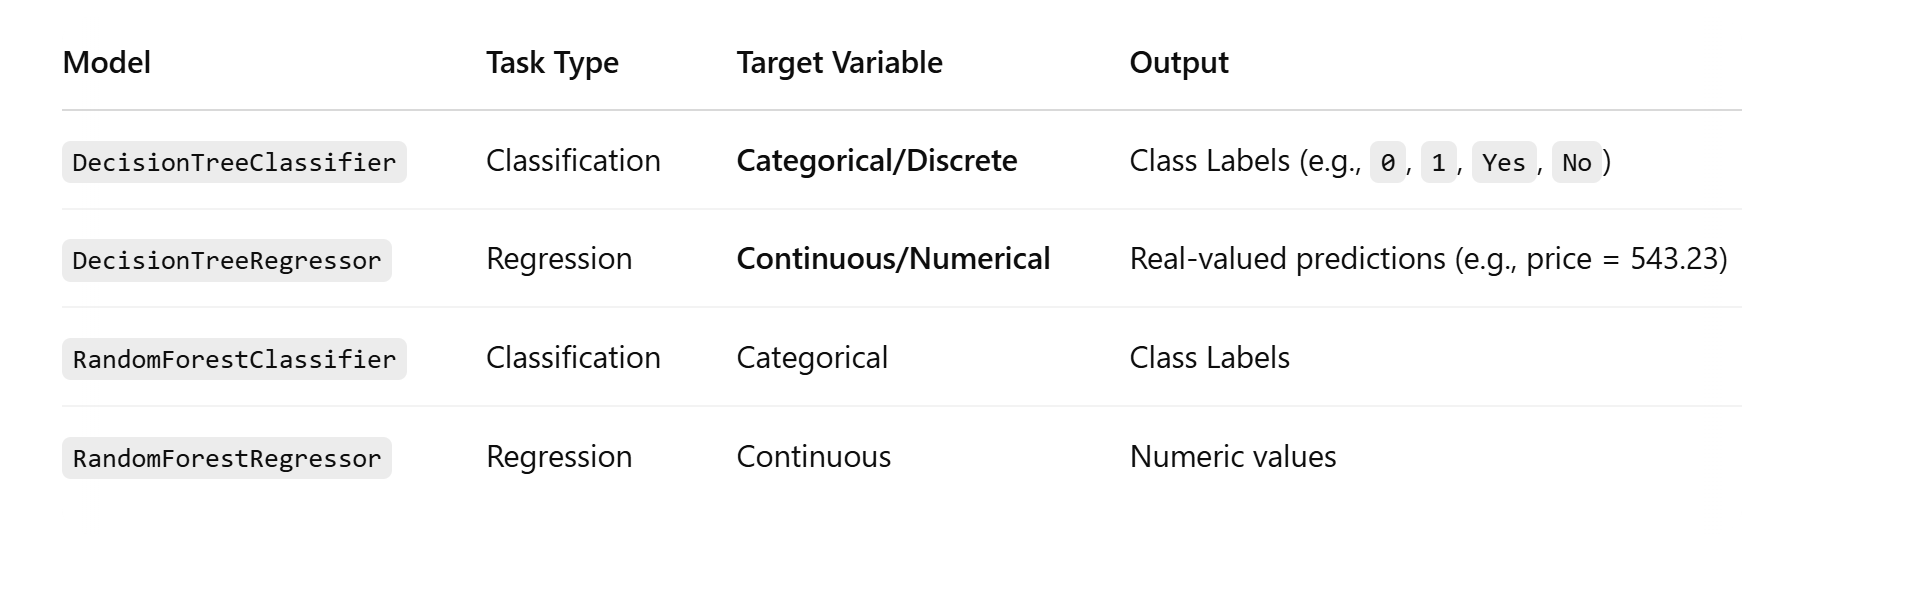

In [ ]:
# California Housing Dataset setup
# X contains the feature matrix, y contains the target variable (median house value)
X = california.data
y = california.target
feature_names = X.columns  # Names of the features for later use in plots

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default Models

# Initialize and train a Decision Tree Regressor with default settings
dt_default = DecisionTreeRegressor(random_state=42)
dt_default.fit(X_train, y_train)

# Predict using the trained Decision Tree model
y_pred_dt_default = dt_default.predict(X_test)

# Initialize and train a Random Forest Regressor with default settings
rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train, y_train)

# Predict using the trained Random Forest model
y_pred_rf_default = rf_default.predict(X_test)

# Evaluate Default Models

# Print evaluation metrics for Decision Tree
print("Default Decision Tree Regressor")
#MSE: It measures the average squared difference between predicted values and the actual values in the dataset.
print("MSE:", mean_squared_error(y_test, y_pred_dt_default))  # Mean Squared Error
# R^2: it shows how well the data fit a regression line or curve . R2 = 1 – (RSS/TSS)
print("R2:", r2_score(y_test, y_pred_dt_default))             # Coefficient of Determination (R^2)

# Print evaluation metrics for Random Forest
print("Default Random Forest Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_rf_default))
print("R2:", r2_score(y_test, y_pred_rf_default))



Default Decision Tree Regressor
MSE: 0.5280096503174904
R2: 0.5977192261218356
Default Random Forest Regressor
MSE: 0.25650512920799395
R2: 0.8045734925119942


## California Housing Tasks(Cont..)

Tuned Decision Tree Regressor
MSE: 0.4060448976389037
R2: 0.6906419124096689
Tuned Random Forest Regressor
MSE: 0.25691566592894494
R2: 0.8042607121874106


,Model,MSE ↓ (Lower is Better),R² ↑ (Higher is Better)
0,Default Decision Tree,0.5280,0.5977
1,Default Random Forest,0.2565 (Better),0.8046 (Better)
2,Tuned Decision Tree,0.4060 (Better & Improved),0.6906 (Better & Improved)
3,Tuned Random Forest,0.2569 ~ (Same),0.8043 ~ (Same)


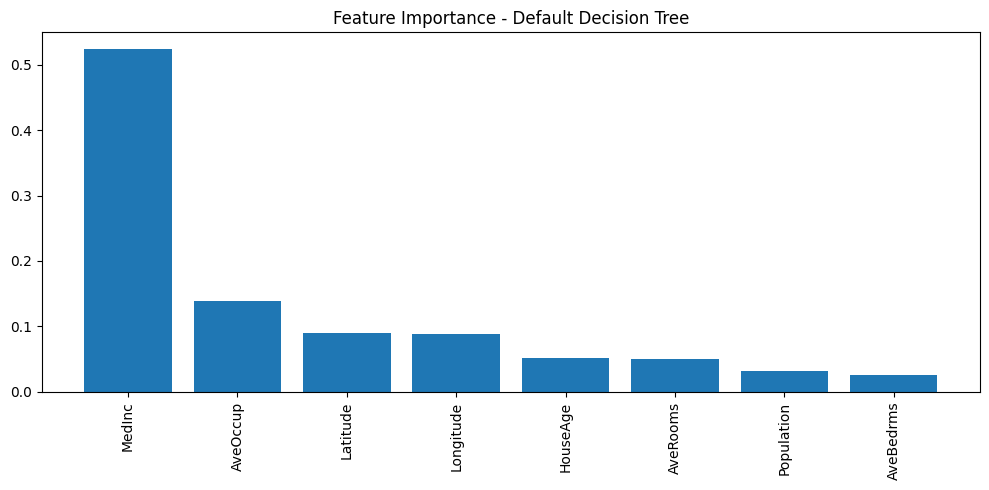

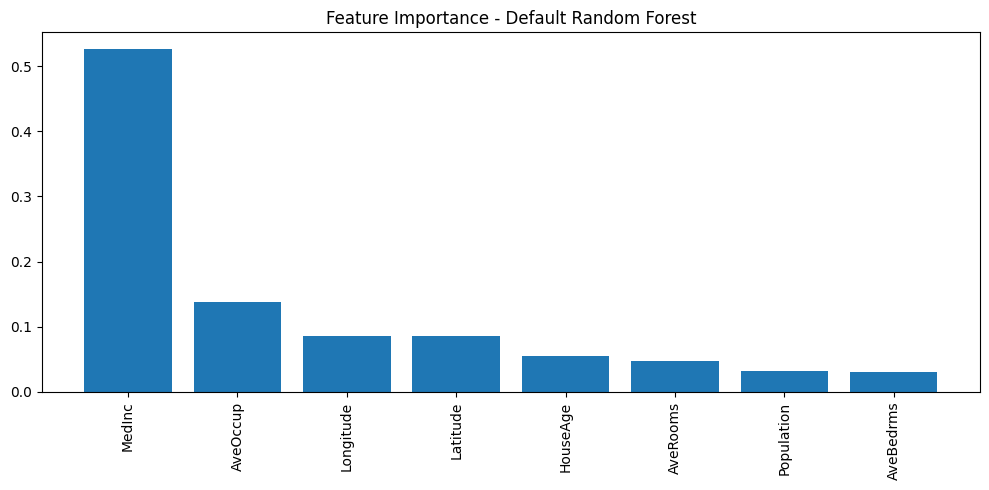

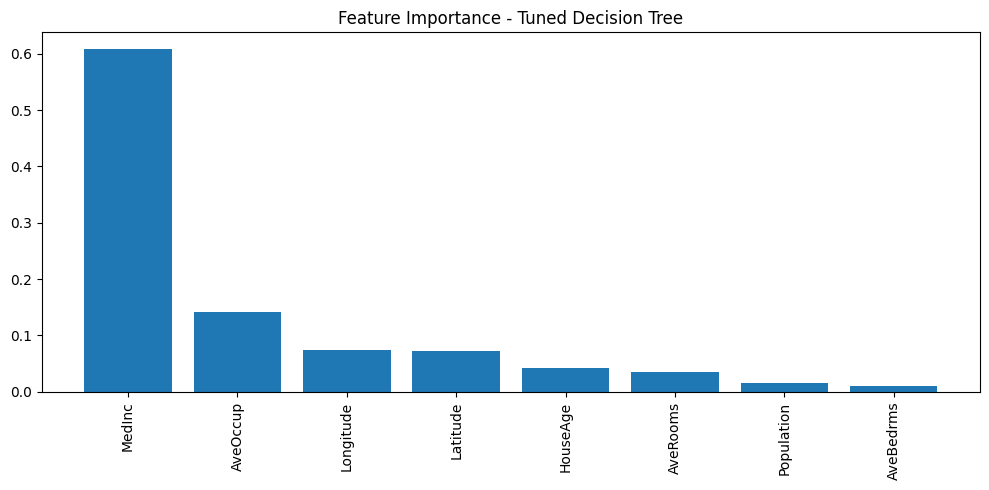

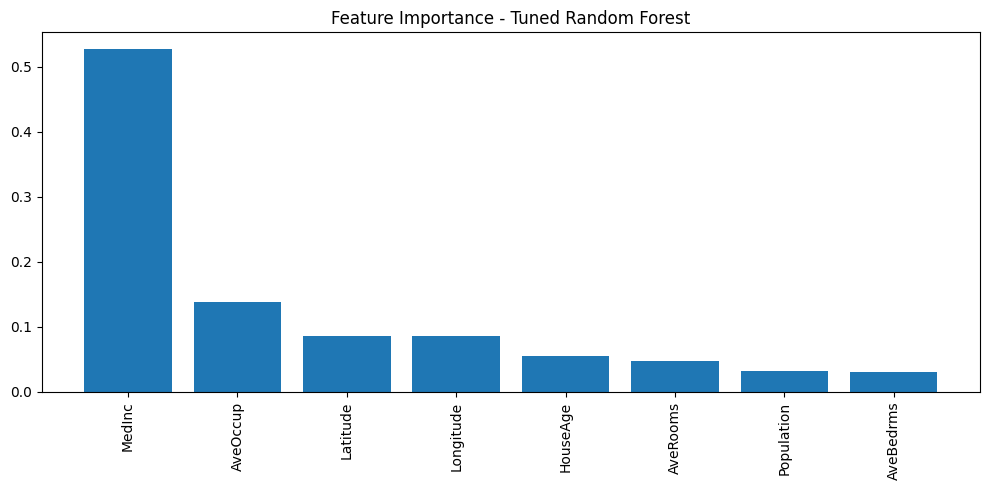

In [ ]:

# Tuned Models using GridSearchCV
#finding the optimal parameter values from a given set of parameters in a grid

# Define hyperparameters to search for Decision Tree
# Trying at least 2, 5, or 10 samples
# Trying trees with max depths of 5, 10, and 20
dt_params = {"max_depth": [5, 10, 20], "min_samples_split": [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='r2')
dt_grid.fit(X_train, y_train)  # Perform grid search
dt_best = dt_grid.best_estimator_  # Best model from search
y_pred_dt_best = dt_best.predict(X_test)  # Predict with best DT model

# Define hyperparameters to search for Random Forest
rf_params = {"n_estimators": [50, 100], "max_depth": [10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate Tuned Models

# Print metrics for best Decision Tree
print("Tuned Decision Tree Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_dt_best))
print("R2:", r2_score(y_test, y_pred_dt_best))

# Print metrics for best Random Forest
print("Tuned Random Forest Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_rf_best))
print("R2:", r2_score(y_test, y_pred_rf_best))



data = {
    "Model": [
        "Default Decision Tree",
        "Default Random Forest",
        "Tuned Decision Tree",
        "Tuned Random Forest"
    ],
    "MSE ↓ (Lower is Better)": [
        "0.5280",
        "0.2565 (Better)",
        "0.4060 (Better & Improved)",
        "0.2569 ~ (Same)"
    ],
    "R² ↑ (Higher is Better)": [
        "0.5977",
        "0.8046 (Better)",
        "0.6906 (Better & Improved)",
        "0.8043 ~ (Same)"
    ]
}
display(pd.DataFrame(data))



# Feature Importances

# Function to plot feature importance from trained models
def plot_feature_importance(model, title):
    importances = model.feature_importances_  # Extract feature importance
    indices = np.argsort(importances)[::-1]  # Sort in descending order

    # Plot bar chart of importances
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot feature importances for each model
plot_feature_importance(dt_default, "Feature Importance - Default Decision Tree")
plot_feature_importance(rf_default, "Feature Importance - Default Random Forest")
plot_feature_importance(dt_best, "Feature Importance - Tuned Decision Tree")
plot_feature_importance(rf_best, "Feature Importance - Tuned Random Forest")


# Digits DataSet

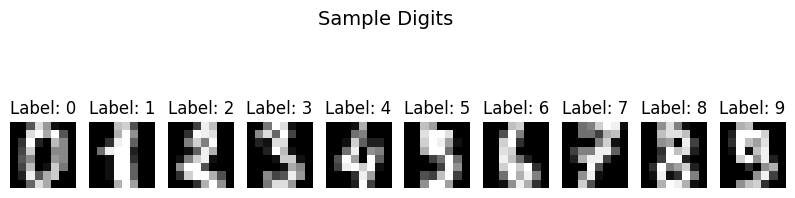

Dataset shape: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]
           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...  

In [ ]:
# Load Digit Dataset
X_digits = digits.data  # Flattened pixel values of digit images
y_digits = digits.target  # Labels corresponding to each digit image (0–9)

# First 9 Digits
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')  # Show the digit image in grayscale
    ax.set_title(f"Label: {digits.target[i]}")  # Show the actual label
    ax.axis('off')  # Remove axis ticks
plt.suptitle("Sample Digits", fontsize=14)
plt.show()

# EDA (Exploratory Data Analysis)
print("Dataset shape:", X_digits.shape)  # Number of samples and features
print("Target classes:", np.unique(y_digits))  # Unique labels (0–9)
df = pd.DataFrame(X_digits)
print(df.describe())  # Statistical summary of pixel intensities







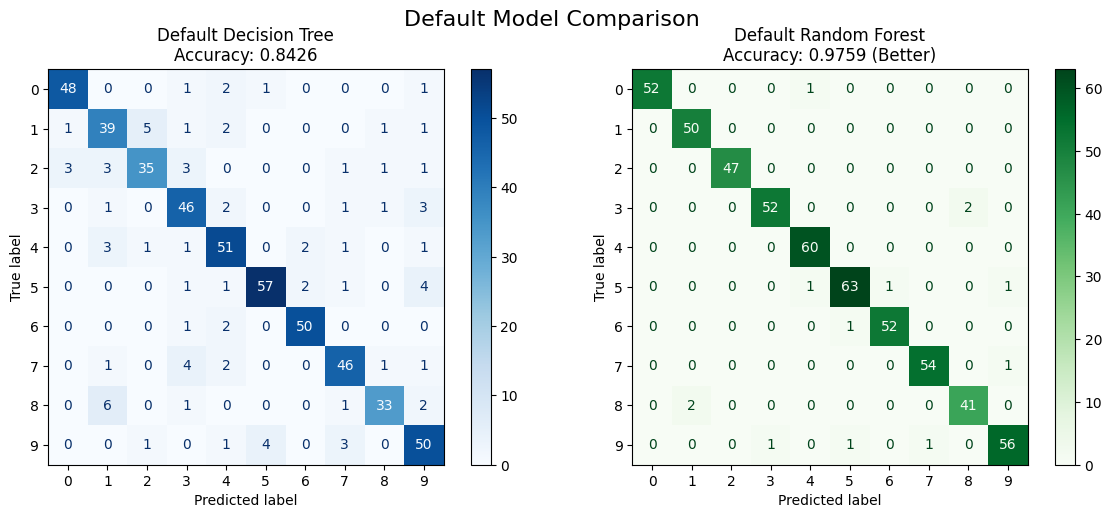

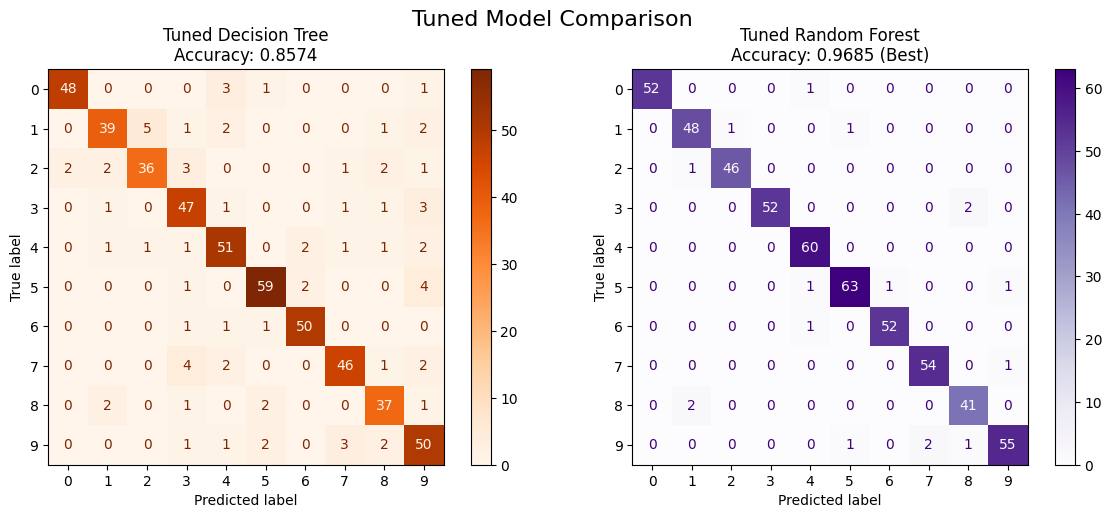

,Model,Accuracy
0,Default Decision Tree,0.8426
1,Default Random Forest,0.9759
2,Tuned Decision Tree,0.8574
3,Tuned Random Forest,0.9685


In [ ]:

# Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

# ----------------------------
# Train Default Models
# ----------------------------
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

# ----------------------------
# Plot Default Confusion Matrices
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=axes[0], cmap="Blues")
axes[0].set_title(f"Default Decision Tree\nAccuracy: {acc_dt:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap="Greens")
axes[1].set_title(f"Default Random Forest\nAccuracy: {acc_rf:.4f} (Better)")
plt.suptitle("Default Model Comparison", fontsize=16)
plt.tight_layout()
plt.show()

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
# Tune Decision Tree
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    {"max_depth": [10, 20, None], "min_samples_split": [2, 5, 10]},
    cv=3,
    scoring="accuracy"
)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
y_pred_dt_best = dt_best.predict(X_test)
acc_dt_best = accuracy_score(y_test, y_pred_dt_best)

# Tune Random Forest
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    {"n_estimators": [50, 100], "max_depth": [10, None]},
    cv=3,
    scoring="accuracy"
)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)
acc_rf_best = accuracy_score(y_test, y_pred_rf_best)

# ----------------------------
# Plot Tuned Confusion Matrices
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_best, ax=axes[0], cmap="Oranges")
axes[0].set_title(f"Tuned Decision Tree\nAccuracy: {acc_dt_best:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_best, ax=axes[1], cmap="Purples")
axes[1].set_title(f"Tuned Random Forest\nAccuracy: {acc_rf_best:.4f} (Best)")
plt.suptitle("Tuned Model Comparison", fontsize=16)
plt.tight_layout()
plt.show()

# ----------------------------
# Final Accuracy Summary Table
# ----------------------------
summary_df = pd.DataFrame({
    "Model": [
        "Default Decision Tree",
        "Default Random Forest",
        "Tuned Decision Tree",
        "Tuned Random Forest"
    ],
    "Accuracy ": [
        round(acc_dt, 4),
        round(acc_rf, 4),
        round(acc_dt_best, 4),
        round(acc_rf_best, 4)
    ]
})

display(summary_df)

# Digit DS Features

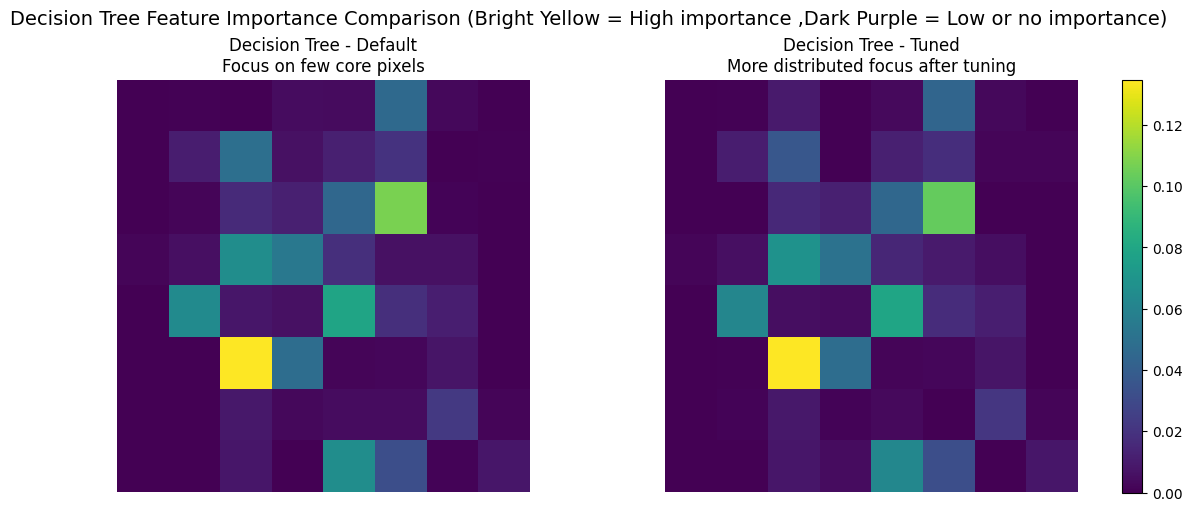

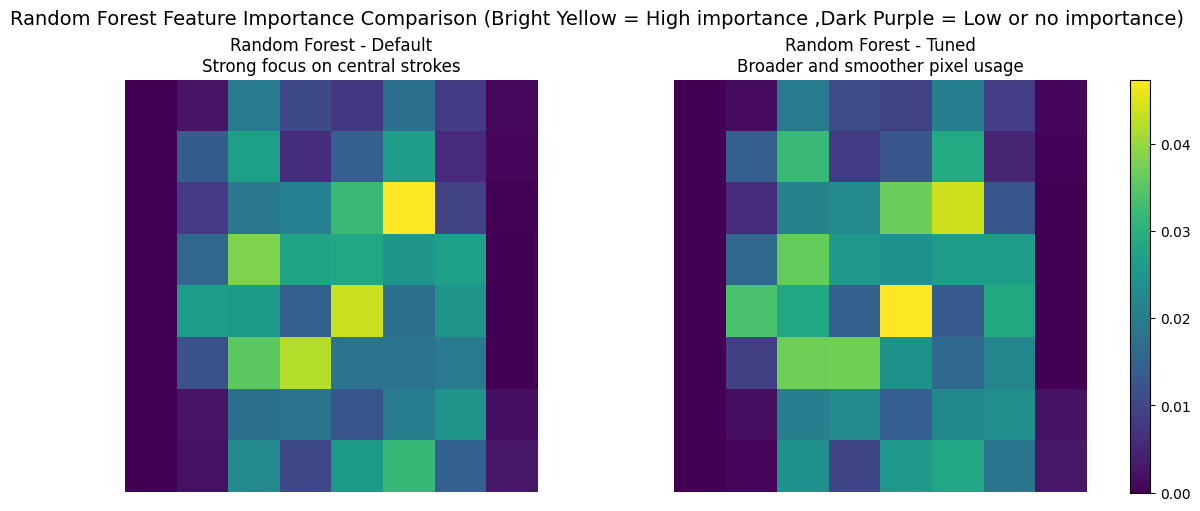

In [ ]:
models = [
    ("Decision Tree", dt_model, dt_best, "Focus on few core pixels", "More distributed focus after tuning"),
    ("Random Forest", rf_model, rf_best, "Strong focus on central strokes", "Broader and smoother pixel usage")
]

for name, default_model, tuned_model, note1, note2 in models:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
    im0 = axes[0].imshow(default_model.feature_importances_.reshape(8, 8), cmap='viridis')
    axes[0].set_title(f"{name} - Default\n{note1}")
    axes[0].axis('off')

    # Tuned model importance
    im1 = axes[1].imshow(tuned_model.feature_importances_.reshape(8, 8), cmap='viridis')
    axes[1].set_title(f"{name} - Tuned\n{note2}")
    axes[1].axis('off')

    fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.03, pad=0.04)
    plt.suptitle(f"{name} Feature Importance Comparison (Bright Yellow = High importance ,Dark Purple = Low or no importance)", fontsize=14)
    plt.show()